## CSCE5222.002 Assignment_3 <br>
The assignment 3 is the combination of ICE 9 and ICE 10. You may find something helpful in these two ICEs

## Task 1. Edge detection <br>
In task 1, you need to apply different edge detection methods to an image. Please finish<br>
1. Apply sharpening filter to the image and display the edge image;
2. Apply Sobel filter to the image and display the edge image;
3. Apply Fourier transform to the image, apply high pass filter to the frequency domain graph, then recover the image to spatial domain and display the edge image in spatial domain;
4. Apply Fourier transform to the image, extract the phase part of the image, then recover the phase part of the image to spatial domain and display the phase part of the image in spatial domain.

In [1]:
import matplotlib.pyplot as pta
import cv2
import numpy as npm
from math import sqrt,exp
import random

In [2]:
#READING IMAGE
img=cv2.imread(r"C:\Desktop\Rajesh\images\3.jpg")
b,g,r = cv2.split(img)

<ipython-input-3-2922581608af>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.float32(f_bounded),"gray")


(-0.5, 479.5, 359.5, -0.5)

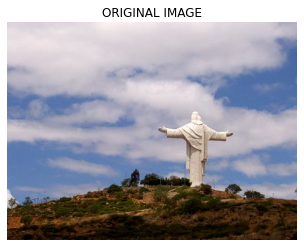

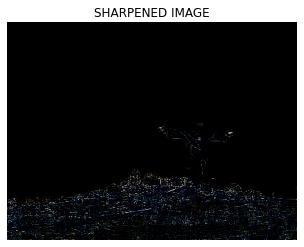

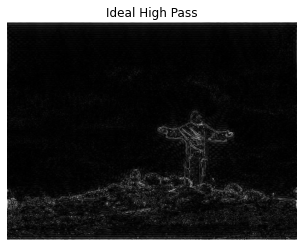

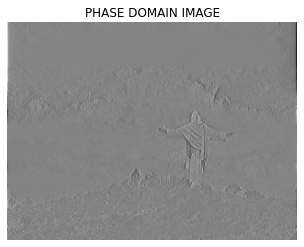

In [3]:
sharpen = npm.array([[-1, -1, -1],
                    [-1, 7, -1],
                    [-1, -1, -1]])

sobel = npm.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

pta.figure()
pta.imshow(img[:,:,::-1])
pta.axis("off")
pta.title("ORIGINAL IMAGE")

img1=cv2.filter2D(img,-1,sharpen)
pta.figure()
pta.imshow(img1[:,:,::-1])
pta.axis("off")
pta.title("SHARPENED IMAGE")

img2=cv2.filter2D(img,-1,sobel)
pta.figure()
pta.imshow(img2[:,:,::-1])
pta.axis("off")
pta.title("SOBEL IMAGE")

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
def idealFilterHP(D0,imgShape):
    base = npm.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
original = npm.fft.fft2(b)
center = npm.fft.fftshift(original)
HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = npm.fft.ifftshift(HighPassCenter)
inverse_HighPass = npm.fft.ifft2(HighPass)
pta.imshow(n.abs(inverse_HighPass), "gray")
pta.axis("off")
pta.title("Ideal High Pass")

gimg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f = npm.fft.fft(gimg)
f_shift = npm.fft.fftshift(f)
f_ang=npm.angle(f_shift)
ifa = npm.fft.ifftshift(n.exp(1j*f_ang))
f_bounded = npm.fft.ifft(ifa)
pta.figure()
pta.imshow(n.float32(f_bounded),"gray")
pta.title("PHASE DOMAIN IMAGE")
pta.axis("off")

## Task 2. Image smoothing
In task 2, you need to apply different image smoothing methods to an image. Please finish<br>
1. Apply Gaussian smoothing filter to the image and display the result;
2. Apply Mean filter to the image and display the result;
3. Apply Fourier transform to the image, apply low pass filter to the frequency domain graph, then recover the image to spatial domain and display the result in spatial domain.

(-0.5, 479.5, 359.5, -0.5)

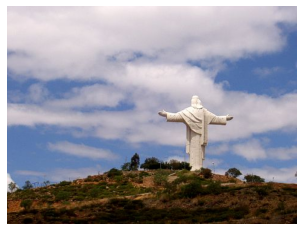

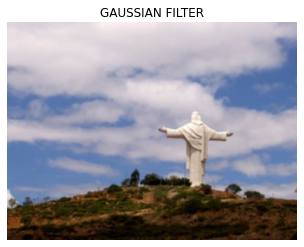

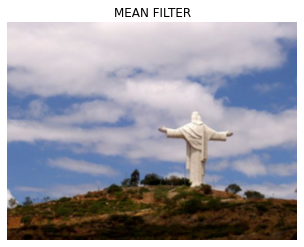

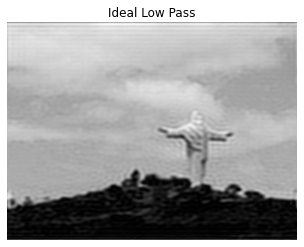

In [4]:
import math
def gaussian(a):
    sum=0
    mid=int(a/2)
    h = npm.empty((a,a), float)
    for i in range(0,a):
        for j in range(0,a):
            h[i][j]= math.exp(-(((pow((abs(i-mid)),2)+pow(abs(j-mid),2))/8)))
    h=h/(npm.sum(h))
    return h

pta.figure()
pta.imshow(img[:,:,::-1])
pta.axis("off")
g3=gaussian(3)
img1=cv2.filter2D(img,-1,g3)
pta.figure()
pta.imshow(img1[:,:,::-1])
pta.axis("off")
pta.title("GUASSIAN FILTER")

mean = npm.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])

img2=cv2.filter2D(img,-1,mean)
pta.figure()
pta.imshow(img2[:,:,::-1])
pta.axis("off")
pta.title("MEAN FILTER")

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)


def idealFilterLP(D0,imgShape):
    base = npm.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

original = npm.fft.fft2(b)
center = npm.fft.fftshift(original)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = npm.fft.ifftshift(LowPassCenter)
inverse_LowPass = npm.fft.ifft2(LowPass)
pta.figure()
pta.imshow(nup.abs(inverse_LowPass), "gray")
pta.title("Ideal Low Pass")
pta.axis("off")

## Task 3. Noise removing
In task 3, you need to apply different noise removing methods to an image. Please finish<br>
1. Add salt and pepper noise to an image and display the noisy image;
2. Apply Median filter to the noisy image to remove the noise and display the result;
3. Apply Fourier transform to the noisy image, apply band-pass filter to the frequency domain graph, recover the output to spatial domain and display the result.

<ipython-input-5-1f045337e591>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 359 + 1) instead
  randX=np.random.random_integers(0,src.shape[0]-1)
<ipython-input-5-1f045337e591>:8: DeprecationWarning: This function is deprecated. Please call randint(0, 479 + 1) instead
  randY=np.random.random_integers(0,src.shape[1]-1)
<ipython-input-5-1f045337e591>:9: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if np.random.random_integers(0,1)==0:


Text(0.5, 1.0, 'Ideal BANDPASS')

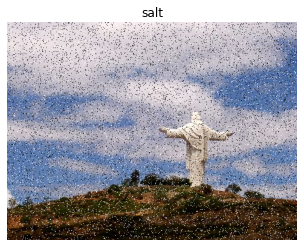

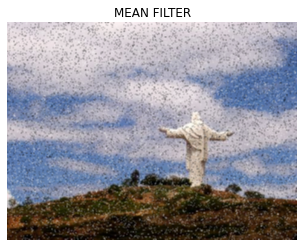

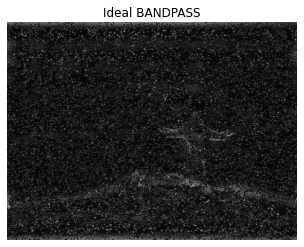

In [5]:
def SaltAndPepper(src,percetage):
    SP_NoiseImg=src
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(SP_NoiseNum):
        randX=npm.random.random_integers(0,src.shape[0]-1)
        randY=npm.random.random_integers(0,src.shape[1]-1)
        if n.random.random_integers(0,1)==0:
            SP_NoiseImg[randX,randY]=0
        else:
            SP_NoiseImg[randX,randY]=255
percetage=0.1
SaltAndPepper(img,percetage)
pta.figure()
pta.title("salt")
pta.axis("off")
pta.imshow(img[:,:,::-1])

img2=cv2.filter2D(img,-1,mean)
pta.figure()
pta.imshow(img2[:,:,::-1])
pta.axis("off")
pta.title("MEAN FILTER")

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterHP(D0,D1,imgShape):
    base = npm.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center)<=D0 and distance((y,x),center)>=D1:
                base[y,x] = 1
    return base

original = npm.fft.fft2(img[:,:,1])
center = npm.fft.fftshift(original)
HighPassCenter = center * idealFilterHP(150,10,img.shape)
HighPass = npm.fft.ifftshift(HighPassCenter)
inverse_HighPass = npm.fft.ifft2(HighPass)
pta.figure()
pta.imshow(n.abs(inverse_HighPass), "gray")
pta.axis("off")
pta.title("Ideal BANDPASS")